# Mini-project - Customer segmentation with clustering

Understanding and serving customers are two of the retail industry's most important strategic marketing objectives. Knowing the customer allows businesses to be more customer-centric with improvements to metrics such as marketing efficiency, enhanced product development, increased customer satisfaction, better customer retention, price optimisation, and strategic resource allocation.

Customer segmentation allows a business to group customers based on demographics (e.g. age, gender, education, occupation, marital status, family size), geographics (e.g. country, transportation, preferred language), psychographics (e.g. lifestyle, values, personality, attitudes), behaviour (e.g. purchase history, brand loyalty, response to marketing activities), technographic (e.g. device type, browser type, original source), and needs (e.g. product features, service needs, delivery method). Your challenge in this project is to apply critical thinking and machine learning concepts to design and implement clustering models to perform customer segmentation and improve marketing efforts.

<br></br>

## **Business context**
We have an e-commerce data set from a real-world organisation to perform customer segmentation with clustering models to improve marketing efforts (SAS, 2024). It is a transnational data set with customers from five continents (Oceania, North America, Europe, Africa, and Asia) and 47 countries.

The data set contains 951,668 rows, each representing a product a customer ordered. The data set contains details about the customer (e.g. location, product type, loyalty member) and order (e.g. days to delivery, delivery date, order date, cost, quantity ordered, profit) based on orders between 1 January 2012 and 30 December 2016.

As each customer is unique, it is critical to identify and/or create new features for customer segmentation to inform marketing efforts. The data set has 20 features to choose from:
- **Quantity:** The quantity the customer orders (e.g. 1, 2, 3).
- **City:** Name of the customer's residence (e.g. Leinster, Berowra, Northbridge).
- **Continent:** Name of the continent where the customer resides (Oceania, North America).
- **Postal code:** Where the customer resides (e.g. 6437, 2081, 2063).   
State province: State or province where the customer resides (e.g. Western Australia, Quebec, New South Wales).
- **Order date:** The date the order was placed (e.g. 1 January 2012, 20 June 2014).
- **Delivery date:** The date the order was delivered (e.g. 12 April 2014, 19 November 2016).
- **Total revenue:** Total revenue based on ordered items in USD (e.g. 123.80, 85.10).
- **Unit cost:** Cost per unit ordered in USD (e.g. 9.10, 56.90).
- **Discount:** Percentage or normal total retail price (e.g. 50%, 30%).
- **Order type label:** Method in which the order was placed (e.g. internet sale, retail sale).
- **Customer country label:** The country where the customer resides (e.g. Australia, Canada, Switzerland).
- **Customer birthdate:** The date the customer was born (e.g. 8 May 1978, 18 December 1987).
- **Customer group:** Loyalty member group (e.g. internet/catalogue customers, Orion club gold members).
- **Customer type:** Loyalty member level (e.g. internet/catalogue customers, Orion club gold members high activity).
- **Order ID:** Unique order identifier (e.g. 1230000033).
- **Profit:** Total profit is calculated: $Total\:profit=Total\:revenue-(Unit\:cost\times Quantity)$.
- **Days to delivery:** The number of days for delivery is calculated: $Delivery\:days=Delivery\:date-Order\:date$ (e.g. 6, 3, 2).
- **Loyalty number:** Loyal customer (99) versus non-loyal customer (0).
- **Customer ID:** A unique identifier for the customer (e.g. 8818, 47793).

Since we have a transnational data set, which implies customers from different continents, several metrics are important when performing customer segmentation for target marketing. From a marketing perspective, the following five metrics help to understand the nuance of the customer base, buying behaviour, preferences, and value to the business.
- **Frequency** indicates how often a customer purchases over a given period of time. A high frequency indicates a loyal customer, a high level of satisfaction, trust or brand loyalty, and/or effective marketing efforts. Frequency based on purchases guides a business in the effectiveness of target marketing campaigns and how to target less active customers.
- **Recency** measures how recently a customer made a purchase or placed an order. It helps predict customer churn (turnover) and engagement. A customer is a business’s most valuable asset, so securing customer retention is essential. A high recency indicates customer satisfaction and engagement.
- **Customer lifetime value (CLV)** indicates the average or total value a customer contributes to a business over the course of their relationship. In other words, CLV is a metric of the total income a business can expect to generate from a customer as long as said customer remains a loyal client. CLV helps to prioritise marketing efforts and resources as it focuses on customers who are expected to bring the most value over time. Therefore, retaining high-value customers.
- The **average unit cost** indicates if the customer prefers low cost or high cost items. This is related to the profitability of purchases. Customers buying products with a higher average unit cost price should be targeted differently. Customer segmentation assists in identifying these customers.


The task is to develop a robust customer segmentation to assist the e-commerce company in understanding and serving its customers better. This will help to have a more customer-centric focus, improving marketing efficiency.


<br></br>

> **Disclaimer**
>
> Note that although a real-life data set was provided, the business context in this project is fictitious. Any resemblance to companies and persons (living or dead) is coincidental. The course designers and hosts assume no responsibility or liability for any errors or omissions in the content of the business context and data sets. The information in the data sets is provided on an 'as is' basis, with no guarantees of completeness, accuracy, usefulness, or timeliness.

<br></br>

In [ ]:
!pip install gdown

In [ ]:
!gdown 'https://drive.google.com/uc?export=download&id=1S5wniOV5_5htDfUFeZhlCLibvtihNLKK'

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1S5wniOV5_5htDfUFeZhlCLibvtihNLKK
From (redirected): https://drive.google.com/uc?export=download&id=1S5wniOV5_5htDfUFeZhlCLibvtihNLKK&confirm=t&uuid=306afaef-8a9a-4e0f-90d2-b3d024c3713b
To: /content/CUSTOMERS_CLEAN.csv
100% 191M/191M [00:04<00:00, 42.4MB/s]


In [ ]:
# Import the necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
main_df = pd.read_csv('CUSTOMERS_CLEAN.csv')
print(main_df.shape)
main_df.head(5)

(951669, 20)


,Quantity,City,Continent,Postal_Code,State_Province,Order_Date,Delivery_Date,Total Revenue,Unit Cost,Discount,OrderTypeLabel,CustomerCountryLabel,Customer_BirthDate,Customer_Group,Customer_Type,Order ID,Profit,Days to Delivery,Loyalty Num,Customer ID
0,3,Leinster,Oceania,6437,Western Australia,01JAN2012,07JAN2012,$28.50,$9.10,.,Internet Sale,Australia,08MAY1978,Internet/Catalog Customers,Internet/Catalog Customers,1230000033,$1.20,6,99,8818
1,2,Berowra,Oceania,2081,New South Wales,01JAN2012,04JAN2012,$113.40,$56.90,.,Internet Sale,Australia,13DEC1978,Orion Club Gold members,Orion Club Gold members high activity,1230000204,($0.40),3,99,47793
2,2,Berowra,Oceania,2081,New South Wales,01JAN2012,04JAN2012,$41.00,$18.50,.,Internet Sale,Australia,13DEC1978,Orion Club Gold members,Orion Club Gold members high activity,1230000204,$4.00,3,99,47793
3,1,Northbridge,Oceania,2063,New South Wales,01JAN2012,03JAN2012,$35.20,$29.60,.,Internet Sale,Australia,22JUN1997,Orion Club Gold members,Orion Club Gold members high activity,1230000268,$5.60,2,0,71727
4,1,Montréal,North America,NaN,Quebec,01JAN2012,04JAN2012,$24.70,$23.60,.,Internet Sale,Canada,28JAN1978,Orion Club Gold members,Orion Club Gold members medium activity,1230000487,$1.10,3,99,74503


- Our main dataframe has 951,669 rows and 20 columns.
- This is a dataset with various customer orders for products.
- PROBLEM - We have been tasked to develop a robust customer segmentation to assist the e-commerce company in understanding and serving its customers better. This will help to have a more customer-centric focus, improving marketing efficiency.
- For operational and time efficiency, it has been agreed to conduct feature engineering of the 5 features [frequency, recency, CLV, average unit cost & Customer age] first before embarking on other pre-processing tasks.

In [ ]:
# Creating new features for frequency, recency, CLV, Average Unit cost and customer age
main_df['Frequency'] = main_df.groupby('Customer ID')['Order ID'].transform('count')

# Calculate recency (time since last order)
main_df['Recency'] = (pd.to_datetime('today') - pd.to_datetime(main_df['Delivery_Date'])).dt.days

# Create a new DataFrame with selected columns
df = main_df[['Customer ID', 'Frequency', 'Recency', 'Total Revenue', 'Unit Cost', 'Customer_BirthDate']]

df.head(5)

<ipython-input-6-e99d79a9eeb4>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  main_df['Recency'] = (pd.to_datetime('today') - pd.to_datetime(main_df['Delivery_Date'])).dt.days


,Customer ID,Frequency,Recency,Total Revenue,Unit Cost,Customer_BirthDate
0,8818,31,4718,$28.50,$9.10,08MAY1978
1,47793,20,4721,$113.40,$56.90,13DEC1978
2,47793,20,4721,$41.00,$18.50,13DEC1978
3,71727,20,4722,$35.20,$29.60,22JUN1997
4,74503,6,4721,$24.70,$23.60,28JAN1978


In [ ]:
# Convert to Numeric & Rename Total Revenue & Unit Cost columns
def currency_to_float(x):
    """
    Cleans currency strings and converts them to numeric values.

    Args:
        x: The currency string to clean.

    Returns:
        The cleaned numeric value.
    """

    # Remove currency symbols and commas
    x = x.replace('$', '').replace('£', '').replace('€', '').replace(',', '')
    # Convert to numeric
    return float(x)

df['CLV'] = df['Total Revenue'].apply(currency_to_float)

df['Avg_Unit_Cost'] = df['Unit Cost'].apply(currency_to_float)


# Convert the DOB to datetime
df['DOB'] = pd.to_datetime(df['Customer_BirthDate'], format='%d%b%Y')

# Calculate age
today = pd.Timestamp('now')
df['Age'] = (today - df['DOB']).dt.days // 365


print(df.shape)
df.head(5)

<ipython-input-7-1917244c4f43>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CLV'] = df['Total Revenue'].apply(currency_to_float)


(951669, 10)


<ipython-input-7-1917244c4f43>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Avg_Unit_Cost'] = df['Unit Cost'].apply(currency_to_float)
<ipython-input-7-1917244c4f43>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DOB'] = pd.to_datetime(df['Customer_BirthDate'], format='%d%b%Y')
<ipython-input-7-1917244c4f43>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

,Customer ID,Frequency,Recency,Total Revenue,Unit Cost,Customer_BirthDate,CLV,Avg_Unit_Cost,DOB,Age
0,8818,31,4718,$28.50,$9.10,08MAY1978,28.5,9.1,1978-05-08,46
1,47793,20,4721,$113.40,$56.90,13DEC1978,113.4,56.9,1978-12-13,46
2,47793,20,4721,$41.00,$18.50,13DEC1978,41.0,18.5,1978-12-13,46
3,71727,20,4722,$35.20,$29.60,22JUN1997,35.2,29.6,1997-06-22,27
4,74503,6,4721,$24.70,$23.60,28JAN1978,24.7,23.6,1978-01-28,46


In [ ]:
# Checking for missing values
df.isnull().sum()

,0
Customer ID,0
Frequency,0
Recency,0
Total Revenue,0
Unit Cost,0
Customer_BirthDate,0
CLV,0
Avg_Unit_Cost,0
DOB,0
Age,0


- There are no missing values in the selected dataframe.

In [ ]:
# Checking for duplicate values

df[df.duplicated()]

,Customer ID,Frequency,Recency,Total Revenue,Unit Cost,Customer_BirthDate,CLV,Avg_Unit_Cost,DOB,Age
15015,4802,37,4685,$150.10,$128.20,17MAY1978,150.10,128.20,1978-05-17,46
25809,29993,24,4655,$59.70,$59.90,15MAR1958,59.70,59.90,1958-03-15,66
59723,91394,24,4578,$26.40,$11.90,18SEP1993,26.40,11.90,1993-09-18,31
60475,74401,99,4573,$55.10,$55.30,08MAR1968,55.10,55.30,1968-03-08,56
71116,6901,9,4554,$53.98,$20.46,17JUL1997,53.98,20.46,1997-07-17,27
85386,21840,24,4524,$85.60,$43.00,09AUG1958,85.60,43.00,1958-08-09,66
88399,8851,36,4510,$207.00,$103.70,11MAY1958,207.00,103.70,1958-05-11,66
144437,87806,33,4381,$26.40,$11.90,03APR1988,26.40,11.90,1988-04-03,36
245412,55877,3,4182,$53.98,$20.46,04JUL1953,53.98,20.46,1953-07-04,71
280487,35746,17,4115,$85.60,$43.00,25JUL1983,85.60,43.00,1983-07-25,41


In [ ]:
# Dropping duplicates
df = df.drop_duplicates()

# Dropping unrequired columns
df = df.drop(['Total Revenue', 'Unit Cost', 'Customer_BirthDate', 'DOB'], axis=1)

print(df.shape)
df.head(5)

(951641, 6)


,Customer ID,Frequency,Recency,CLV,Avg_Unit_Cost,Age
0,8818,31,4718,28.5,9.1,46
1,47793,20,4721,113.4,56.9,46
2,47793,20,4721,41.0,18.5,46
3,71727,20,4722,35.2,29.6,27
4,74503,6,4721,24.7,23.6,46


 - To complete Aggregration, we have decided to apply the following to each feature:
  - Frequency, Avg_Unit_Cost & Age (Average) - This should give us the average (Frequency and Age are unchanged). The mean of the average unit cost will give an idea of the overall average cost per unit for each customer. This will be helpful for understanding cost trends and identifying customers with higher or lower cost preferences.
  - Recency (minimum) - This will provide the time period for the most recent orders each customer has made.
  - CLV (Sum) - This will allow the customers who generate the most revenue to stand out as high value customers and may be useful for targeting and retention efforts.

In [ ]:
# Applying specified aggregation to the dataframe
agg_operations = {
    'Frequency': 'mean',
    'Recency': 'min',
    'CLV': 'sum',
    'Avg_Unit_Cost': 'mean',
    'Age': 'mean'
}

# Applying aggregration while grouping by Customer ID
df_aggr = df.groupby( 'Customer ID' ).agg(agg_operations).reset_index()

# View Output
print(df_aggr.shape)
df_aggr.head(5)

(68300, 6)


,Customer ID,Frequency,Recency,CLV,Avg_Unit_Cost,Age
0,1,35.0,2916,4322.70,89.622857,71.0
1,3,20.0,3018,2821.00,90.505000,41.0
2,4,9.0,4007,782.67,37.195556,41.0
3,5,19.0,2904,2810.98,107.947368,36.0
4,6,15.0,3089,1604.58,52.526667,66.0


 - Now we have our data frame to work from, we will perform Exploratory Data Analysis on it.

In [ ]:
# Performing EDA
#Generating the description Statistics

print(df_aggr.describe(percentiles=[0.05, 0.95]).to_string())

        Customer ID     Frequency       Recency           CLV  Avg_Unit_Cost           Age
count  68300.000000  68300.000000  68300.000000  68300.000000   68300.000000  68300.000000
mean   45447.623397     13.933660   3264.399971   1950.140173      78.895677     51.077042
std    27203.855105     11.329121    414.289931   1719.905150      38.005243     17.487138
min        1.000000      1.000000   2878.000000      0.630000       0.500000     26.000000
5%      4421.950000      2.000000   2903.000000    140.995000      33.800000     27.000000
50%    44140.500000     11.000000   3086.000000   1497.400000      73.449286     51.000000
95%    89512.050000     36.000000   4171.000000   5307.163000     138.578175     81.000000
max    94254.000000    121.000000   4722.000000  18860.960000    1463.500000     81.000000


 - We have a total of 68,300 unique customers in our dataset.
 - The most frequent order number is up to 121 times compared to an average of 13 orders.
 - Recency would benefit with scaling due to the long period since the data set has chosen for order dates for better analysis.
 - There are customer generating total CLV over 18,000 who may be classed as high value customers.
 - Customer ages are sensible ranging 26-81 suggesting potential customer clusters of middle age, mature, senior.

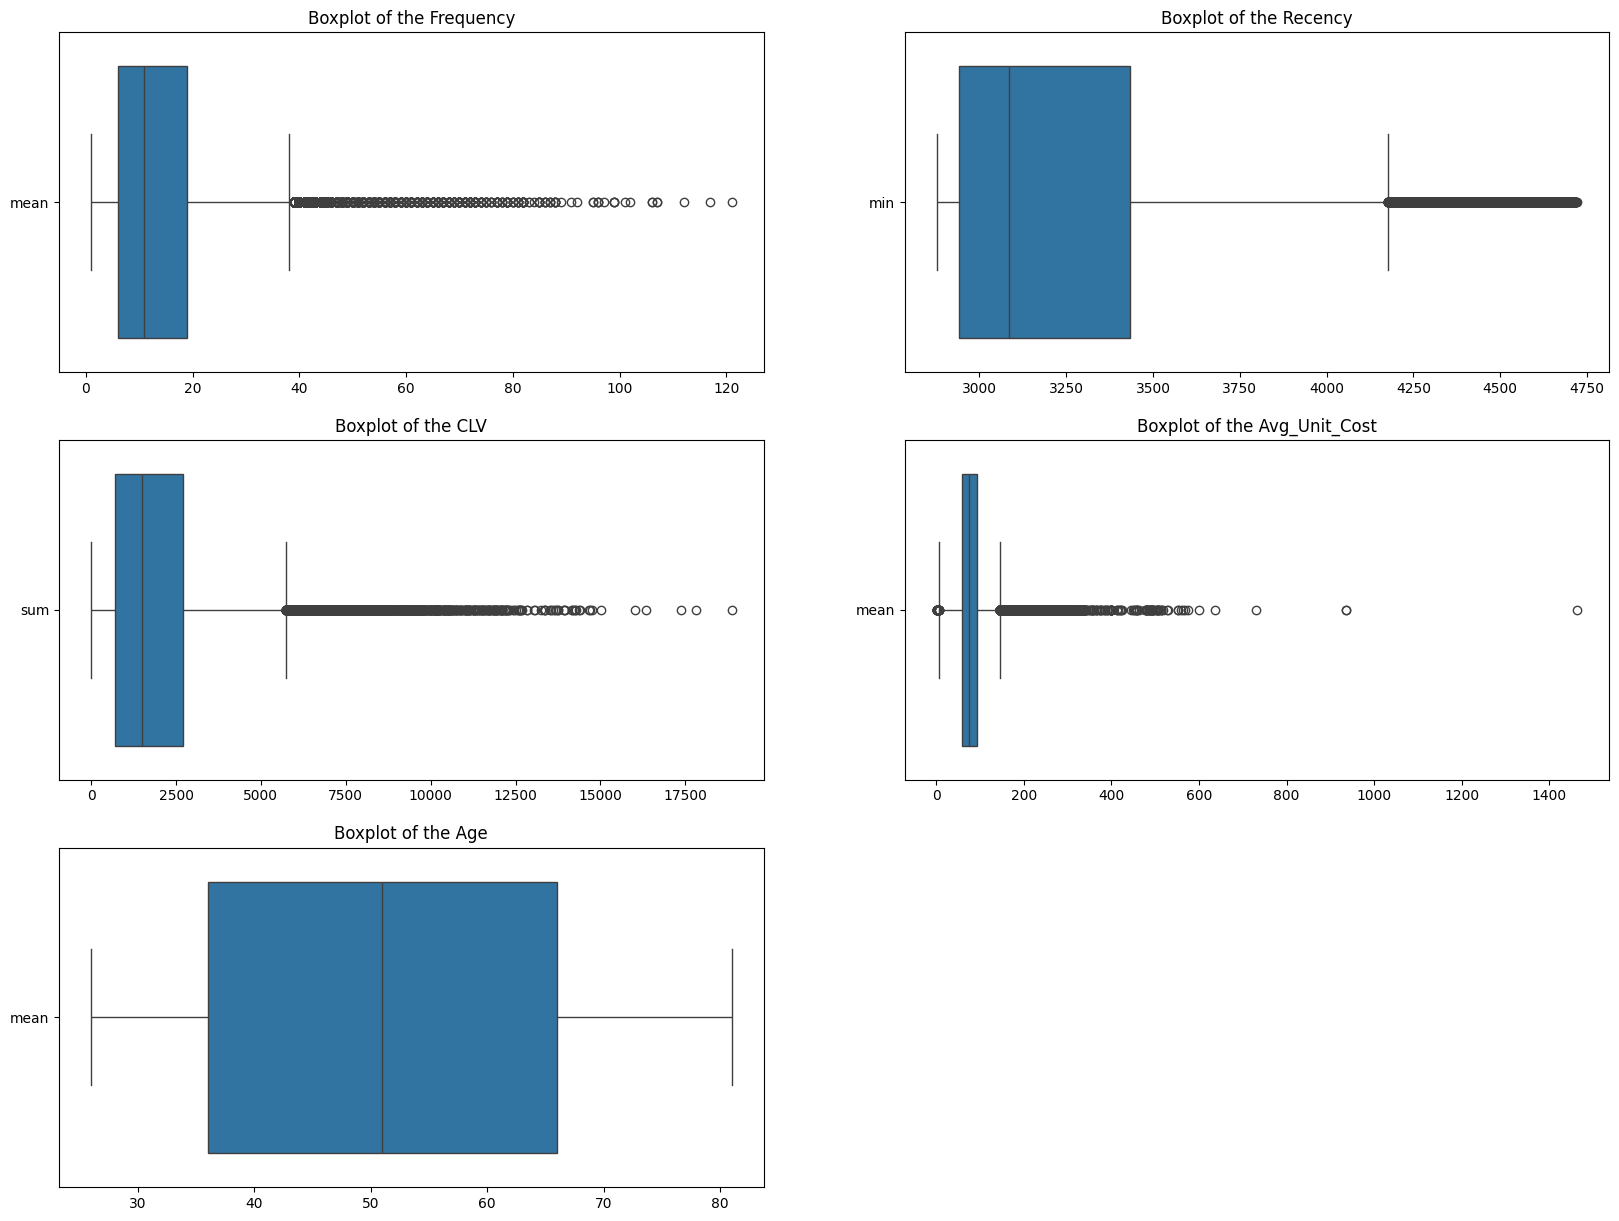

In [ ]:
# Visualising the outliers for the variables with boxplots

plt.figure(figsize=(20, 15))

# Plot the 'Frequency' data.
plt.subplot(3,2,1)
sns.boxplot(df_aggr['Frequency'], orient='h')
plt.title('Boxplot of the Frequency')

# Plot the 'Recency' data.
plt.subplot(3,2,2)
sns.boxplot(df_aggr['Recency'], orient='h')
plt.title('Boxplot of the Recency')

# Plot the 'CLV' data.
plt.subplot(3,2,3)
sns.boxplot(df_aggr['CLV'], orient='h')
plt.title('Boxplot of the CLV')

# Plot the 'Avg_Unit_Cost' data.
plt.subplot(3,2,4)
sns.boxplot(df_aggr['Avg_Unit_Cost'], orient='h')
plt.title('Boxplot of the Avg_Unit_Cost')

# Plot the 'Age' data.
plt.subplot(3,2,5)
sns.boxplot(df_aggr['Age'], orient='h')
plt.title('Boxplot of the Age')

# View the plot.
plt.show()

 - Age does not have any visual outliers.
 - On the other hand, all the others have multiple data points that visually appear to be outliers. These will affect clustering results due to sensitivity to outliers.
 - Avg_unit_cost has a narrow box and short quartile percentile (whiskers) suggesting there is low variability in the variable. In constrast, Age has a wide box and long whiskers suggesting a wide variability in customer ages.

In [ ]:
# Defining the set of feature columns which will be used for our analysis

feature_columns = ['Frequency', 'Recency', 'CLV', 'Avg_Unit_Cost', 'Age']

# Creating a dataframe of the features only
df_feat = df_aggr[feature_columns]

# Performing an Isolation Forest outlier method at 5% outlier contamination

iso_model = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
iso_model.fit(df_feat)

# Predict the class (normal or anomaly).
y_pred = iso_model.predict(df_feat)

# Create a df with the anomalies
df_feat_iso = pd.DataFrame(df_feat)

df_feat_iso['anomaly'] = y_pred

df_feat_iso.head(10)

,Frequency,Recency,CLV,Avg_Unit_Cost,Age,anomaly
0,35.0,2916,4322.70,89.622857,71.0,1
1,20.0,3018,2821.00,90.505000,41.0,1
2,9.0,4007,782.67,37.195556,41.0,1
3,19.0,2904,2810.98,107.947368,36.0,1
4,15.0,3089,1604.58,52.526667,66.0,1
5,31.0,3024,2362.70,45.545161,36.0,1
6,22.0,3017,4794.30,102.513636,41.0,1
7,32.0,2917,4611.29,80.996875,31.0,1
8,9.0,2934,499.99,38.466667,41.0,1
9,16.0,3003,1715.00,52.818750,46.0,1


In [ ]:
# Display outliers in the DataFrame.
anomalies = df_feat_iso[df_feat_iso.anomaly == -1]

# View output.
print("Outliers with contamination (5%):", anomalies.shape[0])

Outliers with contamination (5%): 3415


- Using Isolation Forest method to identify our outliers. We have identified 3,415 outliers (5%) to be anomalies. These may influence the clustering results and therefore recommended to be removed to improve model performance.

In [ ]:
# Removing Outliers
# Reintroduce Customer ID to new data frame

df_feat_iso_with_customer_id = df_feat_iso.merge(df_aggr[['Customer ID']], on=df_aggr.index)
df_feat_iso_with_customer_id_normal = df_feat_iso_with_customer_id[df_feat_iso_with_customer_id['anomaly'] == 1]
df_no_outliers = df_feat_iso_with_customer_id_normal.drop(['anomaly', 'key_0'], axis=1)
print(df_no_outliers.shape)
df_no_outliers.head(5)


(64885, 6)


,Frequency,Recency,CLV,Avg_Unit_Cost,Age,Customer ID
0,35.0,2916,4322.70,89.622857,71.0,1
1,20.0,3018,2821.00,90.505000,41.0,3
2,9.0,4007,782.67,37.195556,41.0,4
3,19.0,2904,2810.98,107.947368,36.0,5
4,15.0,3089,1604.58,52.526667,66.0,6


- We are now left with a dataframe with the required features and customer ID after removing extreme outliers at 5% which we can now start performing clustering methods.

In [ ]:
# Using Column Transformer to scale with Standardisation
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, feature_columns)
    ])

# Fit and transform the data
X_transformed = preprocessor.fit_transform(df_no_outliers)

# Create a new DataFrame with the transformed features
df_transformed = pd.DataFrame(X_transformed, columns=feature_columns)
df_transformed.head(5)

,Frequency,Recency,CLV,Avg_Unit_Cost,Age
0,2.203313,-0.857701,1.676676,0.432498,1.154717
1,0.665847,-0.587240,0.653905,0.462058,-0.573668
2,-0.461628,2.035172,-0.734351,-1.324313,-0.573668
3,0.563350,-0.889520,0.647081,1.046543,-0.861732
4,0.153359,-0.398978,-0.174569,-0.810576,0.866653


- The data is now scaled and can be used for k-means clustering.

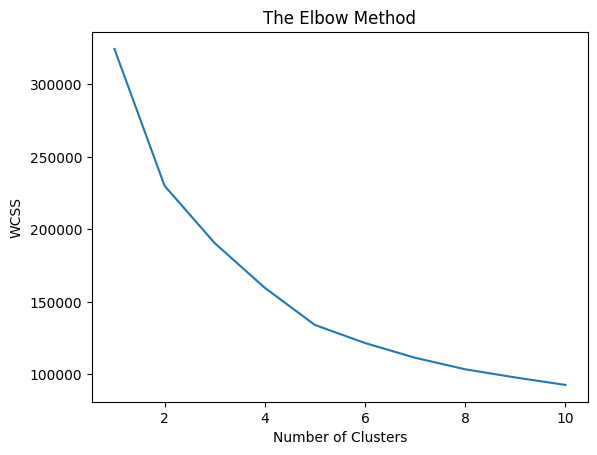

In [ ]:
# CLUSTERING WITH ML MODELS
# Performing k-means
# Elbow method: try different k.
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0, n_init = 10)
    kmeans.fit(df_transformed)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

 - The elbow method shows a point of change/slight levelling up in the slope at x=5, although it is not very clear if this is the perfect number of clusters. We will try the silhouette to further test for the preferred number of clusters k.

In [ ]:
# Running the Silhoutte score method
range_n_clusters = [2, 5, 6, 8]

for n_clusters in range_n_clusters:

# Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10, n_init = 10)
    cluster_labels = clusterer.fit_predict(df_transformed)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_transformed, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(df_transformed, cluster_labels)

For n_clusters = 2 The average silhouette_score is : 0.2612248657037743
For n_clusters = 5 The average silhouette_score is : 0.2558426989535698
For n_clusters = 6 The average silhouette_score is : 0.23045031894726586
For n_clusters = 8 The average silhouette_score is : 0.22458150515520856


- Having initially already run Silhoutte score methods for different k clusters, we can see that k=2 or k=5 may be suitable number of clusters given they have higher scores than the other two.
- To dive deeper, will look at k=2, and k=5 visually to understand which one is likely to be the better choice of clusters

For n_clusters = 2, The average silhouette_score is : 0.2612248657037743
For n_clusters = 5, The average silhouette_score is : 0.2558426989535698


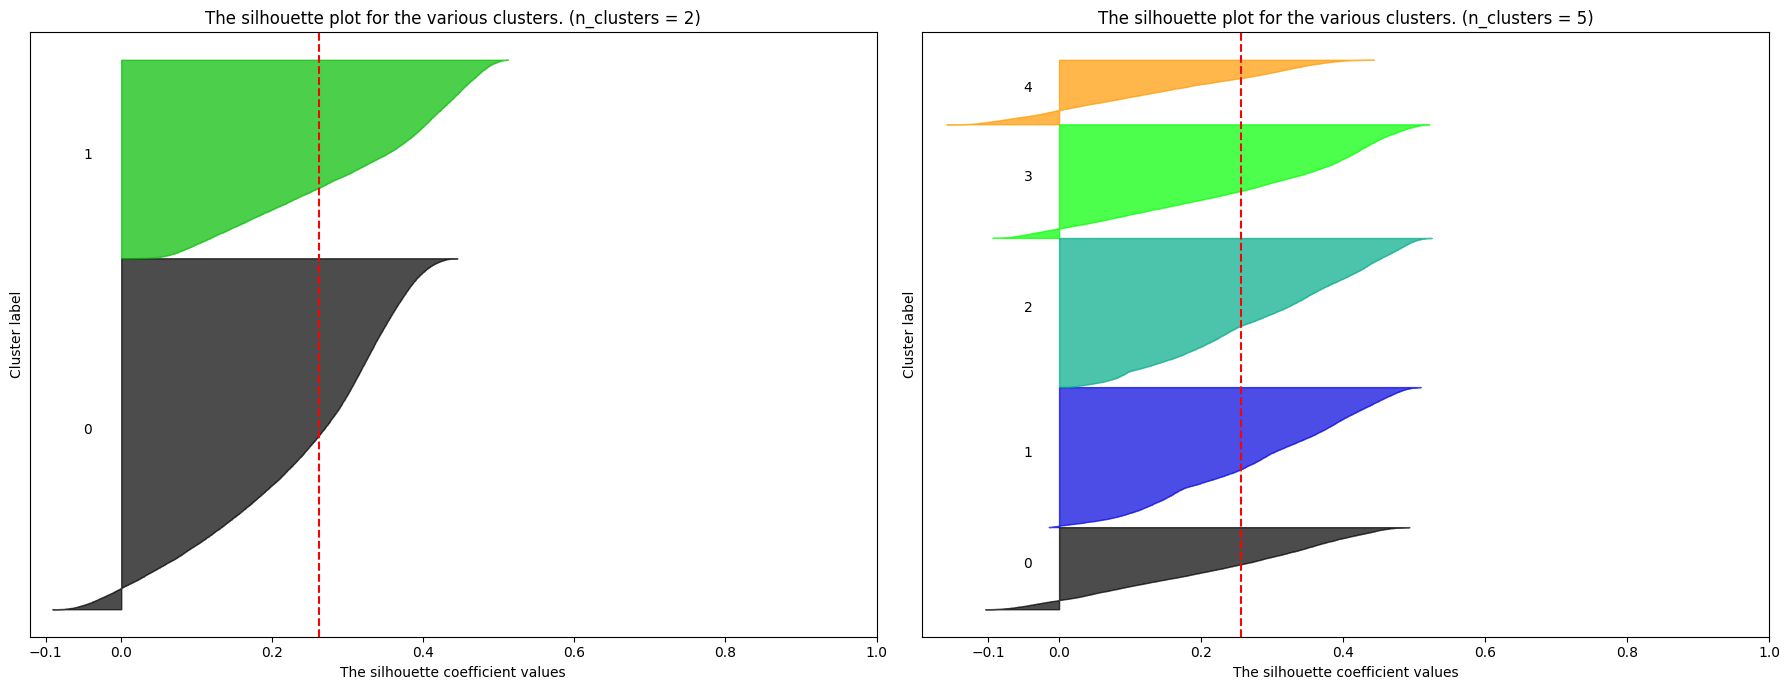

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = [2, 5]

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

for i, n_clusters in enumerate(range_n_clusters):
    ax = axes[i]

    # Initialize the clusterer
    clusterer = KMeans(n_clusters=n_clusters, random_state=10, n_init=10)
    cluster_labels = clusterer.fit_predict(df_transformed)

    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_score(df_transformed, cluster_labels)
    print(f"For n_clusters = {n_clusters}, The average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_transformed, cluster_labels)

    y_lower = 10
    for j in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == j]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(j) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle.
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(j))

        # Compute the new y_lower for next plot.
        y_lower = y_upper + 10

    ax.set_title(f"The silhouette plot for the various clusters. (n_clusters = {n_clusters})")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values.
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.tight_layout()
plt.show()

 - After completing the silhouette scores at k=2 and k=5, we see both plots having clusters where the coefficient values are sometimes negative which suggests potentially a lack of cohesion or further presence of outliers.
 - The higher height of the clusters at k=5 suggests better defined clusters than at k=2.
 - Though further visualisations and tests can be done, due to operational constraints, we will select k=5 as the preferred choice given strong elbow method result and higher silhouette score.

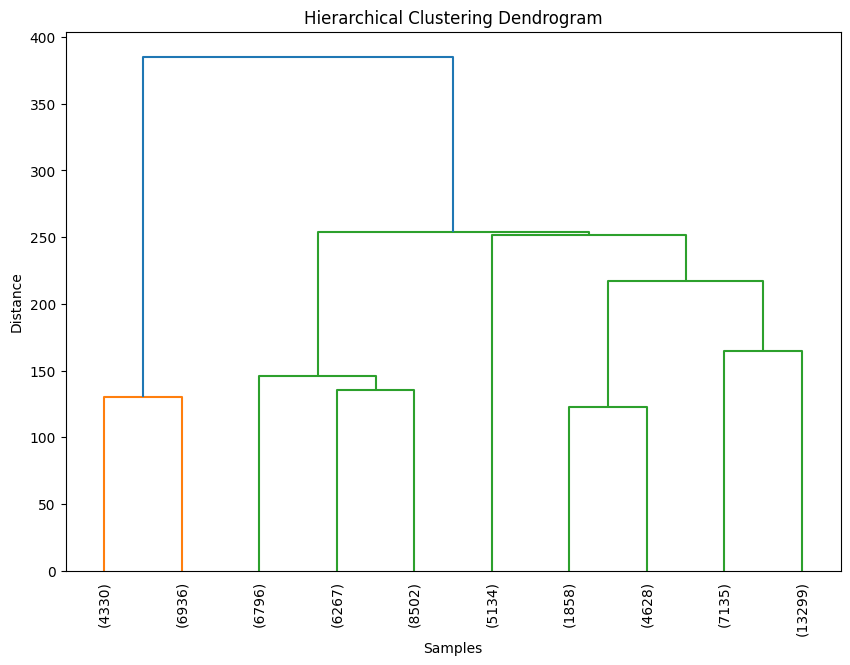

In [ ]:
# 1. Perform hierarchical clustering
# 'ward' linkage minimises the variance of the clusters being merged
linkage_matrix = linkage(df_transformed, method='ward')

# 2. Plot the dendrogram
plt.figure(figsize=(10, 7))  # Adjust the figure size as needed
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
dendrogram(linkage_matrix, truncate_mode='lastp', p=10, leaf_rotation=90., leaf_font_size=10.)
plt.show()

- Looking at the visualisation of the dendrogram, cutting a line at distance=200 would suggest an optimal number of clusters to be 5. Any higher and we lose a lot of the shape and context of the clusters.
- Therefore, **k=5** is the optimal number of clusters to use for our analysis.

In [ ]:
# 8. Performing k-means clustering with k=5

kmeans = KMeans(n_clusters=5, random_state=42)

# Fit the model to the data
kmeans.fit(df_transformed)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Re-labelling clusters to start from 1 for easier readability.
labels = labels + 1
df_no_outliers['Cluster'] = labels
df_no_outliers.head(5)

,Frequency,Recency,CLV,Avg_Unit_Cost,Age,Customer ID,Cluster
0,35.0,2916,4322.70,89.622857,71.0,1,2
1,20.0,3018,2821.00,90.505000,41.0,3,2
2,9.0,4007,782.67,37.195556,41.0,4,4
3,19.0,2904,2810.98,107.947368,36.0,5,2
4,15.0,3089,1604.58,52.526667,66.0,6,3


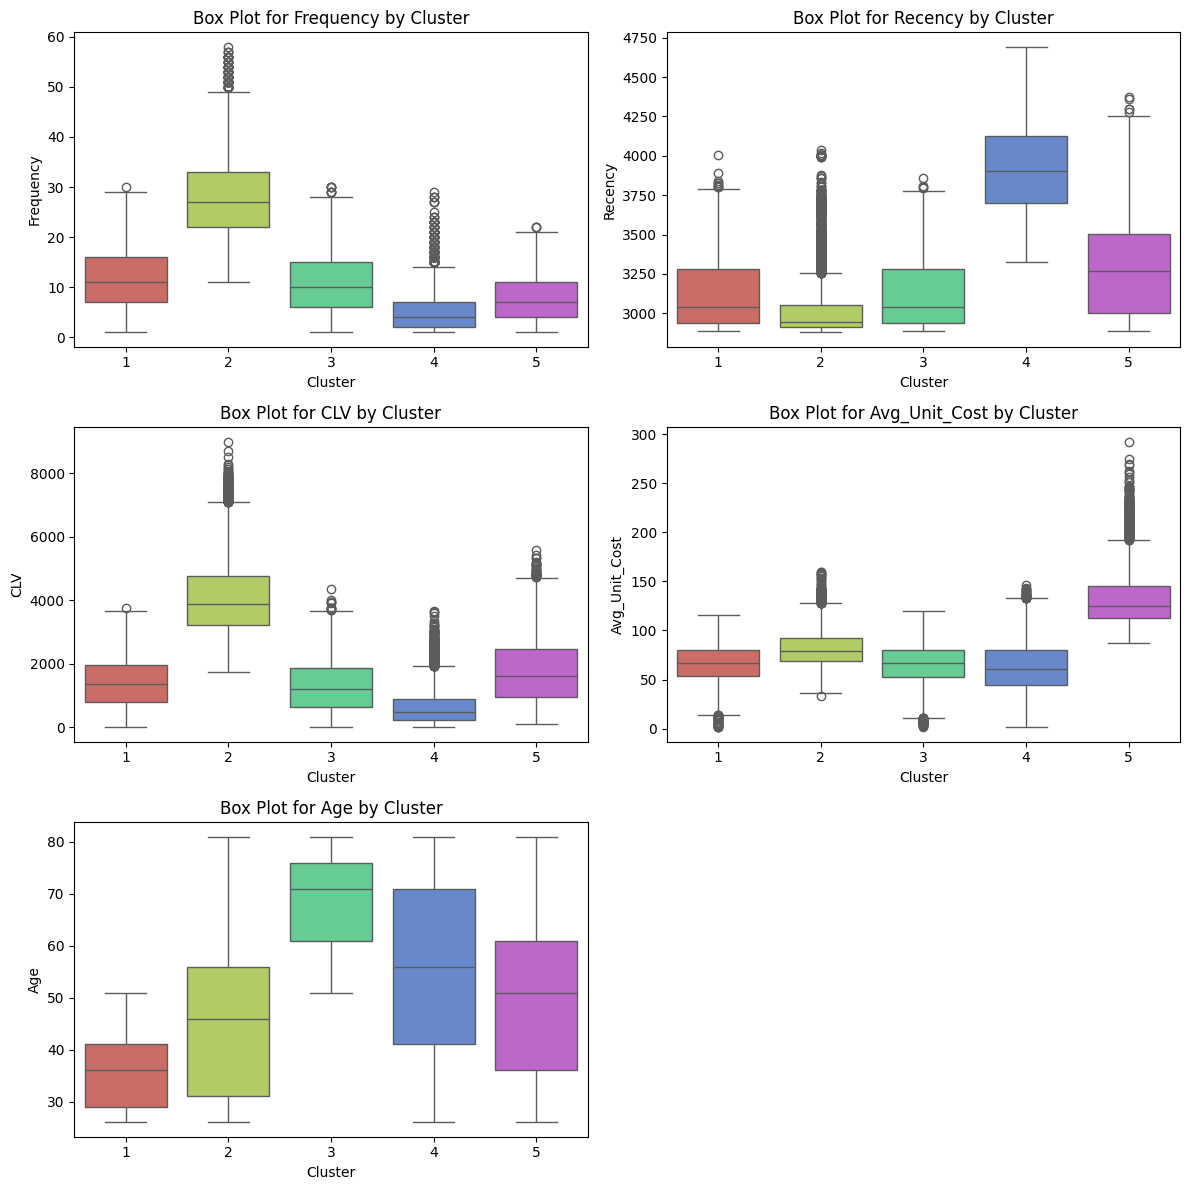

In [ ]:
# 9 & 10. Create box plots for each feature, grouped by cluster

# Exclude 'Customer ID' and 'cluster' columns from boxplots
boxplot_features = [col for col in df_no_outliers.columns if col not in ['Customer ID', 'Cluster']]

# Create a 3x2 grid of subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Iterate over features and create box plots with different colors
cluster_palette = sns.color_palette('hls', len(df_no_outliers['Cluster'].unique()))

for i, feature in enumerate(boxplot_features):
    row, col = divmod(i, 2)

    sns.boxplot(
        x='Cluster',
        y=feature,
        hue='Cluster',
        data=df_no_outliers,
        palette=cluster_palette,
        ax=axes[row, col],
        legend=False
    )

    axes[row, col].set_title(f'Box Plot for {feature} by Cluster')

# Removing extra subplots
if len(boxplot_features) < 6:
    for i in range(len(boxplot_features), 6):
        row, col = divmod(i, 2)
        fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

 - The boxes are distinct and well defined suggesting the clusters do have distinct characteristics.
 - There are similarities in the shape of the Frequency & CLV plot across clusters. This suggests that the impact may be closely related and does not vary significantly across clusters. They are both more influenced by the customers categorised in cluster 2 with extreme values/outliers also seen.
 - Cluster by recency shows cluster 4 with a much higher recency median than the others suggesting on average orders within this cluster are older.
 - Cluster 2 has the best/lowest recency value and combining this with frequency and CLV suggests this group are more early adopters as well as frequent purchasers.
 - Cluster 5 does have the best avg_unit cost values suggesting the profitability is there for the taking were appropriate marketing tactics employed.
 - The final Age box plot suggests that clusters 3 are relatively older than the other clusters with a median of 70 (however, we do consider the dataset has records dated around 12 years ago). Clusters 4 & 5 have more middle-aged customers and clusters 1 & 2 have a younger age bracket than the other clusters.

In [ ]:
# Creating a table/dataframe of the cluster data against these features for quantitive summary analysis
cluster_profiles = []

for cluster_num in df_no_outliers['Cluster'].unique():
    cluster_data = df_no_outliers[df_no_outliers['Cluster'] == cluster_num]

    cluster_profile = {
        'Cluster': cluster_num,
        'Average Frequency': cluster_data['Frequency'].mean(),
        'Average Recency': cluster_data['Recency'].mean(),
        'Average CLV': cluster_data['CLV'].mean(),
        'Average AUC': cluster_data['Avg_Unit_Cost'].mean(),
        'Average Age': cluster_data['Age'].mean()
    }

    cluster_profiles.append(cluster_profile)

# Create a DataFrame from the cluster profiles
cluster_df = pd.DataFrame(cluster_profiles)

print(cluster_df)

   Cluster  Average Frequency  Average Recency  Average CLV  Average AUC  \
0        2          28.225852      3023.851202  4097.603557    81.382093   
1        4           5.478207      3937.815509   637.782305    62.464325   
2        3          10.642111      3114.784657  1282.506285    66.304516   
3        1          11.620049      3118.885721  1389.143625    66.813264   
4        5           7.922140      3286.889963  1766.539354   132.379254   

   Average Age  
0    46.663840  
1    55.145253  
2    68.874301  
3    36.108066  
4    50.591234  


Summary descriptions for each cluster:
- Cluster 2 - High Frequency of purchases/orders, most recent orders, very high lifetime revenue, good profitability per unit cost, young to middle aged group (potentially working class population) - **HIGH VALUE CUSTOMERS**
- Cluster 4 - lowest frequency of purchases, oldest date of last orders (potentially less satisfied), lowest lifetime revenue, average profitability per unit cost, middle-aged - **INACTIVE CUSTOMERS**
- Cluster 3 - Average frequency in purchases, average recency of orders, below average lifetime revenue, average unit cost profitability, comprises the oldest age group/seniors mostly. - **TRADITIONAL CUSTOMERS**
- Cluster 1 -  Average frequency in purchases, average recency of orders, below average lifetime revenue, average unit cost profitability, comprises the youngest age group mostly. - **EMERGING CUSTOMERS**
- Cluster 5 - low frequency of purchases, average recency of orders, average lifetime revenue, highest profitability per avg unit cost, comprises middle-aged/mature (parents) - **HIGHLY PROFITABLE CUSTOMERS**

In [ ]:
# 11. Transform the data with PCA.
PCA_model = PCA(n_components=2)
PCA_transformed_data = PCA_model.fit_transform(df_transformed)

# View the shape and data type.
print("PCA transformed data shape:", PCA_transformed_data.shape)

PCA transformed data shape: (64885, 2)


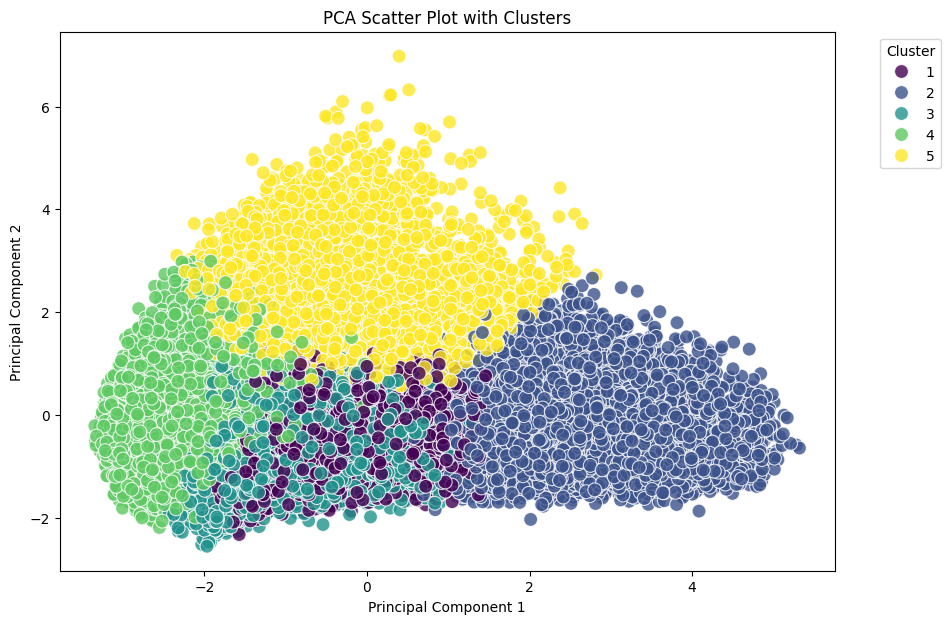

In [ ]:
# Visualise the data with PCA.
# Convert PCA results to a DataFrame
pca_df = pd.DataFrame(PCA_transformed_data, columns=['PC1', 'PC2'])
pca_df['Cluster'] = labels  # Add cluster labels to the DataFrame

# 3. Plot using seaborn
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='Cluster',
    palette='viridis',
    data=pca_df,
    s=100,
    alpha=0.8
)
plt.title('PCA Scatter Plot with Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

- There is quite clear distinct clustering in Clusters 2, 4 & 5. This suggests these groups have clear distinct characteristics which can be identified and targeted for potential further analysis.
- Clusters 1 & 3 are more entangled/interwoven and suggesting these two groups of customers may share strong similarities.  

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


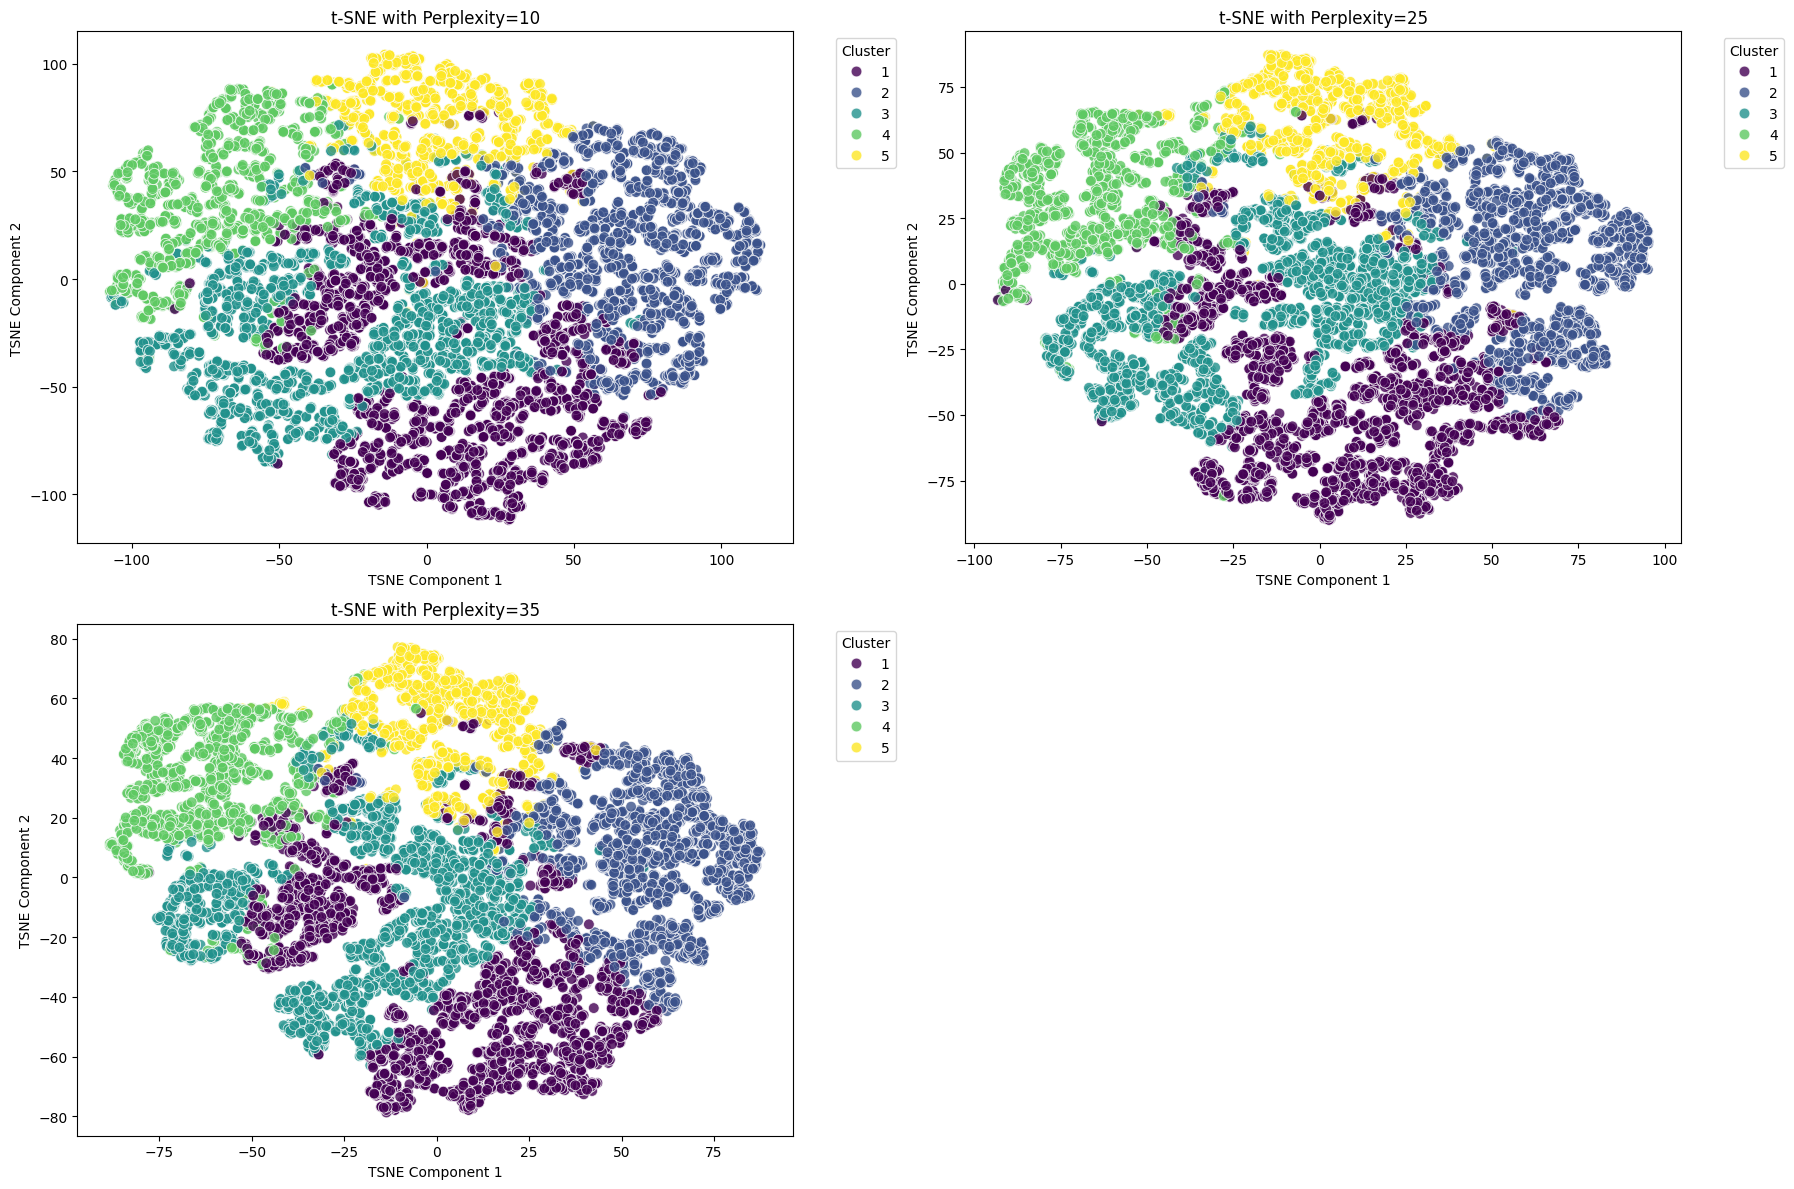

In [ ]:
# Performing T-SNE for reduction with visualisation.
# 1. Optional: Downsample the data if it's too large
# Example: Keep a random sample of 10,000 rows
if len(df_transformed) > 10000:
    sample_indices = np.random.choice(df_transformed.index, size=10000, replace=False)
    df_sampled = df_transformed.loc[sample_indices]
    labels_sampled = labels[sample_indices]  # Ensure labels match the sampled data
else:
    df_sampled = df_transformed
    labels_sampled = labels

# 2. Run t-SNE for different perplexity values
perplexities = [10, 25, 35]
tsne_results = {}

for perplexity in perplexities:
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42, n_iter=1000)
    tsne_results[perplexity] = tsne.fit_transform(df_sampled)

# 3. Plot the results
plt.figure(figsize=(18, 12))

for i, perplexity in enumerate(perplexities, 1):
    tsne_df = pd.DataFrame(tsne_results[perplexity], columns=['TSNE1', 'TSNE2'])
    tsne_df['Cluster'] = labels_sampled

    plt.subplot(2, 2, i)
    sns.scatterplot(
        x='TSNE1',
        y='TSNE2',
        hue='Cluster',
        palette='viridis',
        data=tsne_df,
        s=60,
        alpha=0.8
    )
    plt.title(f't-SNE with Perplexity={perplexity}')
    plt.xlabel('TSNE Component 1')
    plt.ylabel('TSNE Component 2')
    plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

- Considering the T-SNE plots are different perplexities reveals cluster groups which are relatively distinct and identifiable.
- Clusters 2, 4 & 5 seem to form their own main clusters and are largely distinct. Whereas, clusters 1 & 3 are somewhat inter-woven in areas but they also form areas of key clusters that provide an overall clustering position for each.
- These groupings are consistent with the patterns identified when we generated PCA.
- The company should therefore be able to quite comfortably use these distinguished clusters to identify groups of customers from this data that have very distinguished characteristics. They can then tailor their efforts such as marketing and product offers more targeted and precisely to achieve sales growth and maximise revenue.

# Reflect

Write a brief paragraph highlighting your process and the rationale to showcase critical thinking and problem-solving.

> Select the pen from the toolbar to add your entry.

### Reference:
SAS, 2024. CUSTOMERS_CLEAN [Data set]. SAS. Last revised on 15 December 2021. [Accessed 20 February 2024].